# Predicting Ames - EDA & Feature Engineering

#### Jump To:
- [Feature Engineering](#fut_eng)
- [EDA](#eda)
    - [Correlation](#corr)
    - [Distribution](#dist)   

### Imports 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Reading in our datasets

In [2]:
# reading in dataset
df = pd.read_csv('datasets/train_cleanup.csv')
test_df = pd.read_csv('datasets/test_cleanup.csv')
df.head() # make sure it is read in correctly

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Has Pool,Has Fence,Has Fireplace,Finished Basement
0,109,533352170,60,RL,69.0,13517,Pave,0,IR1,Lvl,...,NotApp.,0,3,2010,WD,130500,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,...,NotApp.,0,4,2009,WD,220000,0,0,1,1
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,...,NotApp.,0,1,2010,WD,109000,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,...,NotApp.,0,4,2010,WD,174000,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,...,NotApp.,0,3,2010,WD,138500,0,0,0,1


<a id="feat_eng"> </a>
## Feature Engineering
##### Bathrooms
- We did this as part of our lesson a while back and it is a good idea to bring back to here

In [3]:
# First we noticed that half bath values were counted as whole numbers instead of half
df['Half Bath'] = df['Half Bath']/2
df['Bsmt Half Bath'] = df['Bsmt Half Bath']/2

In [4]:
# From our intro to Ames lesson we identified that we should combine all bathrooms in a total bathroom column
df['Total Bath'] = df['Half Bath'] + df['Bsmt Half Bath'] + df['Bsmt Full Bath'] + df['Full Bath']

In [5]:
# there were 2 null values in the Baths, I'll fill it with the median.
df['Total Bath'].fillna(df['Total Bath'].median(), inplace =True)

In [6]:
# Do for both datasets
test_df['Half Bath'] = test_df['Half Bath']/2
test_df['Bsmt Half Bath'] = test_df['Bsmt Half Bath']/2

test_df['Total Bath'] = test_df['Half Bath'] + test_df['Bsmt Half Bath'] + test_df['Bsmt Full Bath'] + test_df['Full Bath']

test_df['Total Bath'].fillna(test_df['Total Bath'].median(), inplace =True)

#### Square Feet

In [7]:
# add up the total sf of basement, 1st floor, and 2nd floor (I know some areas do not consider basement in total sf)
df['Total SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] +  df['2nd Flr SF']
test_df['Total SF'] = test_df['Total Bsmt SF'] + test_df['1st Flr SF'] + test_df['2nd Flr SF']

In [8]:
df['Total SF'].isnull().sum()

0

<a id='eda'></a>
## EDA

### Let's see our correlations with cleaned data and new columns <a id ='corr'></a>

In [9]:
corr = df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

<AxesSubplot:>

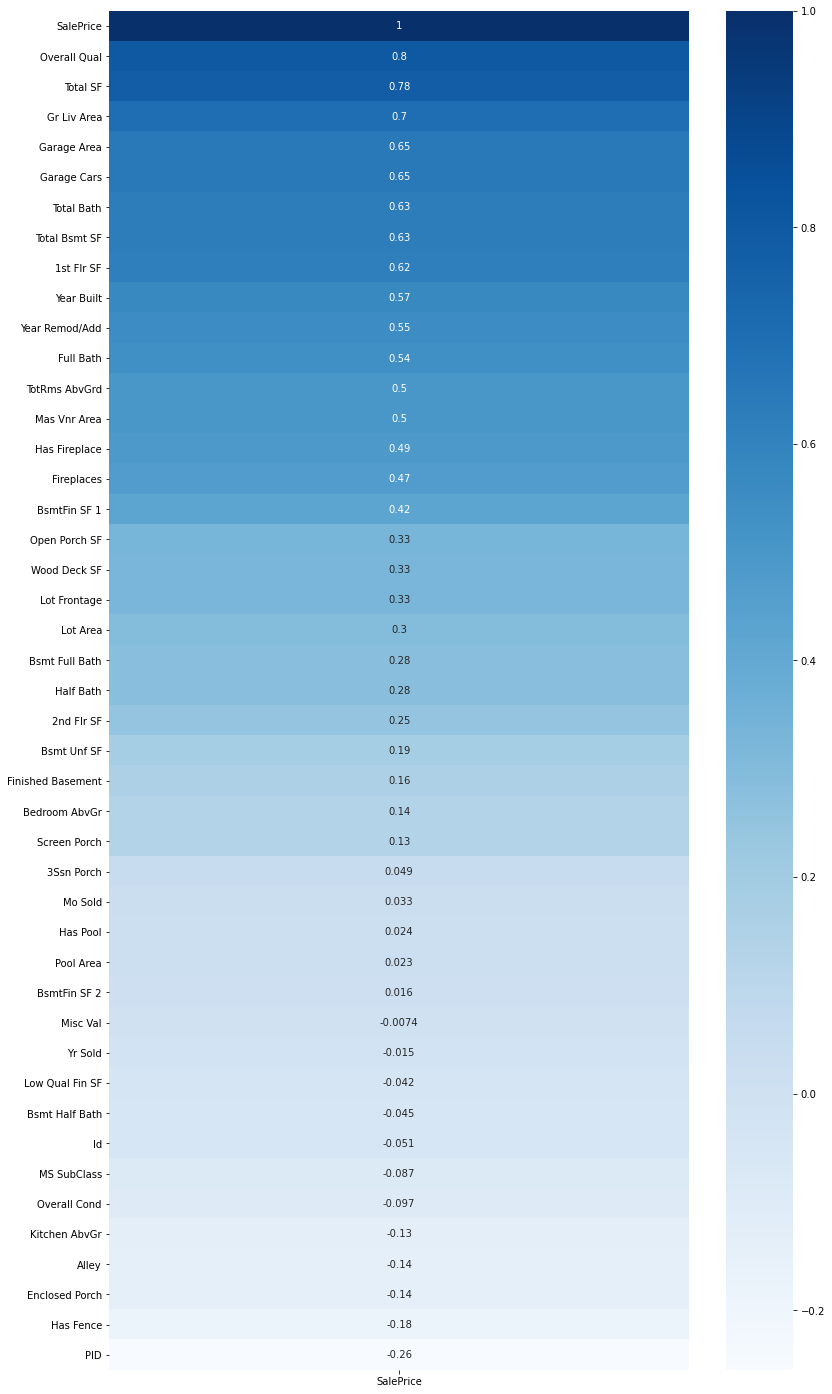

In [16]:
plt.figure(figsize=(13, 25))
sns.heatmap(corr, 
            annot = True, 
            cmap = 'Blues',
            )

From the heatmap I can see there is multicollinearity between:
- Garage Area and Garage Cars (which makes sense, because how many cars you can put in depends on the size of the garage)
- Basement Sqft and 1st Floor Sqft are pretty close to each other, generally if there is a basement it is about the same size as the 1st floor.

- Creating the Total Baths column increased it's correlation, and we can look at baths as a whole instead of in pieces.
- Total SF where we can look at SF as a whole 

<a id ='dist'></a>
### Distribution of SalePrice

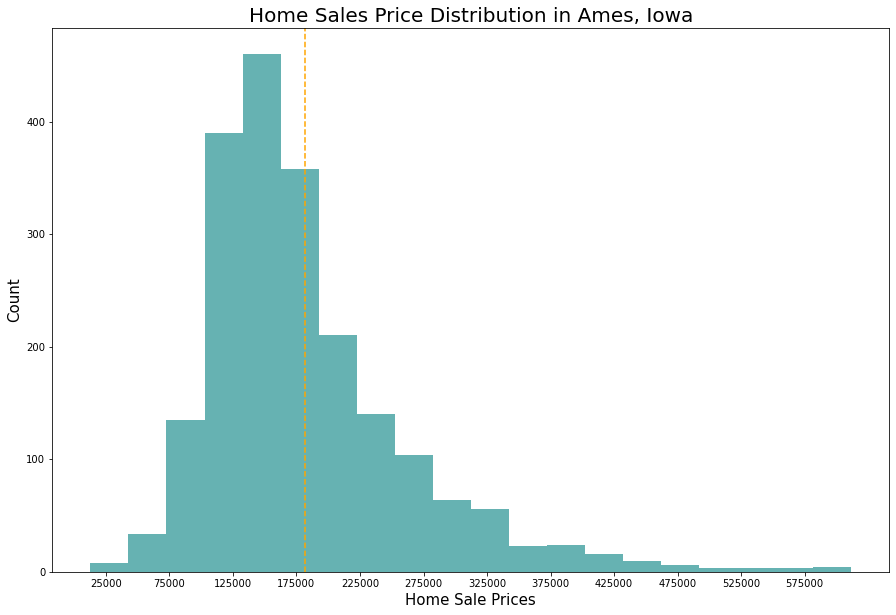

In [11]:
plt.figure(figsize=(15,10))

plt.title('Home Sales Price Distribution in Ames, Iowa', fontsize=20)

plt.xlabel("Home Sale Prices", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.xticks(range(25000, 600000, 50000)) # start at 25,000 go up to 600,000 and show every 50,000

plt.hist(df['SalePrice'], bins=20, color='#66b2b2')
plt.axvline(np.mean(df['SalePrice']), color='orange', ls='--'); # figured out how to do this from
# https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
# Warren Weckesser

<h2><center>The Average Sales Price in Aimes Iowa is $181,470</center></h2>

In [12]:
df.to_csv('./datasets/train_clean.csv', index = False)
test_df.to_csv('./datasets/test_clean.csv', index = False)

In [13]:
# Just to make sure nothing came back
print('null values left on Train', df.isnull().sum().sum())
print('null values left on Test', test_df.isnull().sum().sum())

null values left on Train 0
null values left on Test 0
